## From http://blog.csdn.net/u010414589/article/details/49622625

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [49]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # last 10 to be predicted

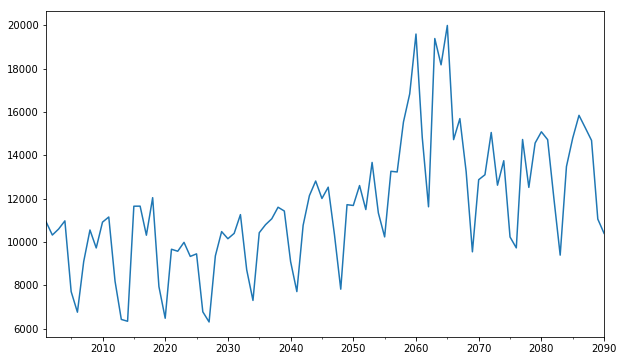

In [50]:
%matplotlib inline
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2100'))
dta90 = dta[:-10]
dta90.plot(figsize=(10,6))

### 一阶差分的时间序列的均值和方差已经基本平稳

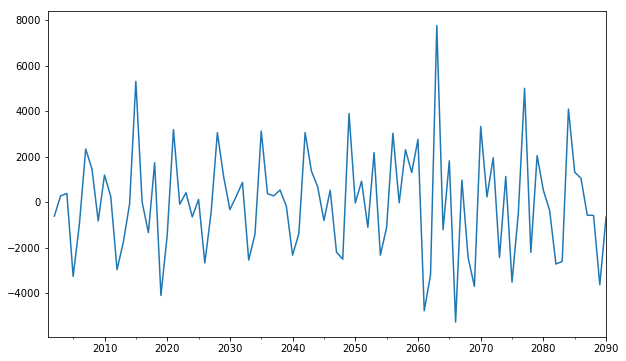

In [51]:
fig = plt.figure(figsize=(10,6))
ax1= fig.add_subplot(111)
diff1 = dta90.diff(1)
diff1.plot(ax=ax1)

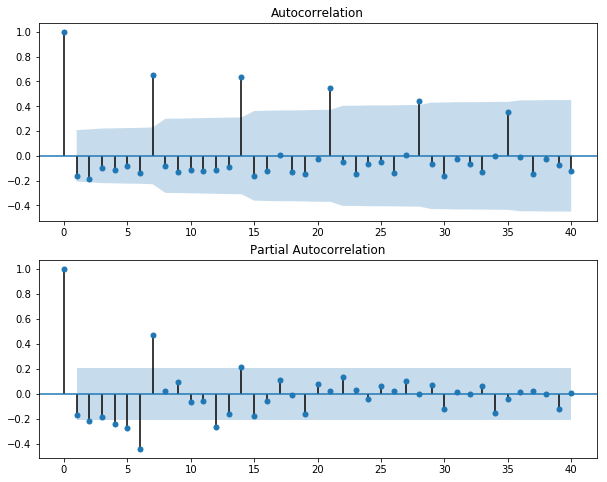

In [52]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1[1:], lags=40, ax=ax2)

In [24]:
arma_mod20 = sm.tsa.ARMA(diff1[1:],(7,0)).fit()
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

arma_mod30 = sm.tsa.ARMA(diff1[1:],(0,1)).fit()
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

arma_mod40 = sm.tsa.ARMA(diff1[1:],(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)

arma_mod50 = sm.tsa.ARMA(diff1[1:],(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

1579.7025548114261 1602.10028214 1588.73043594
1632.320373179573 1639.78628229 1635.32966689


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1581.0916055499633 1605.97796925 1591.12258459
1581.395783676683 1606.28214737 1591.42676271


ARMA(7,0)的aic，bic，hqic均最小

## 模型检验

在指数平滑模型下，观察ARIMA模型的残差是否是平均值为0且方差为常数的正态分布（服从零均值、方差不变的正态分布），同时也要观察连续残差是否（自）相关。

In [25]:
resid = arma_mod20.resid

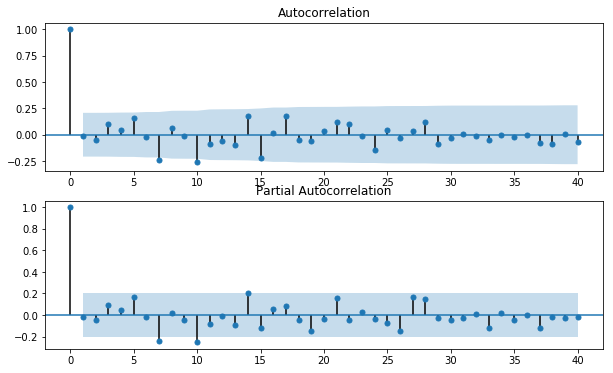

In [28]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

德宾-沃森检验,简称D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。  
DW＝４＜＝＞ρ＝－１　即存在负自相关性   
DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性 

In [32]:
print(sm.stats.durbin_watson(arma_mod20.resid.values))

2.02424663105


### QQ图观察是否符合正态分布

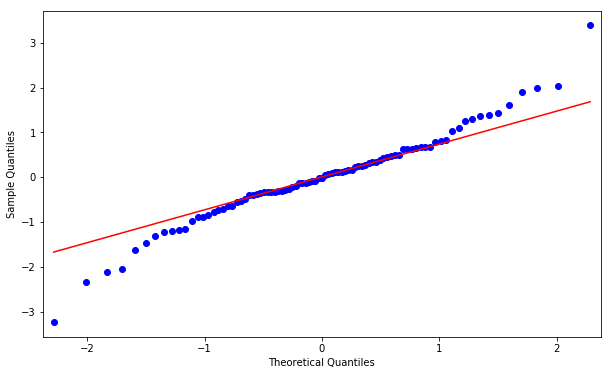

In [34]:
resid = arma_mod20.resid#残差
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

### Ljung-Box检验  
对于ARIMA模型，其残差被假定为高斯白噪声序列，所以当我们用ARIMA模型去拟合数据时，拟合后我们要对残差的估计序列进行LB检验，判断其是否是高斯白噪声，如果不是，那么就说明ARIMA模型也许并不是一个适合样本的模型。

In [35]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.014445   0.019203  0.889785
2.0  -0.047441   0.228722  0.891936
3.0   0.097775   1.129025  0.770072
4.0   0.047514   1.344133  0.853844
5.0   0.156222   3.697206  0.593780
6.0  -0.017858   3.728324  0.713385
7.0  -0.241226   9.475672  0.220284
8.0   0.068076   9.939054  0.269330
9.0  -0.012040   9.953729  0.354244
10.0 -0.256683  16.708334  0.081072
11.0 -0.085180  17.461707  0.094941
12.0 -0.063575  17.886825  0.119170
13.0 -0.096512  18.879433  0.126890
14.0  0.181119  22.421832  0.070352
15.0 -0.223097  27.869218  0.022402
16.0  0.012917  27.887728  0.032610
17.0  0.176768  31.402560  0.017834
18.0 -0.053141  31.724687  0.023695
19.0 -0.057703  32.109931  0.030375
20.0  0.037424  32.274326  0.040462
21.0  0.120522  34.004358  0.036200
22.0  0.102662  35.278381  0.036227
23.0 -0.007829  35.285903  0.048712
24.0 -0.148547  38.035366  0.034385
25.0  0.046253  38.306097  0.043174
26.0 -0.032620  38.442885  0

## 模型预测

2090-12-31   -1598.999128
2091-12-31     337.403074
2092-12-31   -1934.358005
2093-12-31    -554.940434
2094-12-31    3796.800893
2095-12-31   -1529.023459
2096-12-31    1150.256909
2097-12-31    -996.858137
2098-12-31     -54.742150
2099-12-31    -978.334180
2100-12-31    -476.793931
Freq: A-DEC, dtype: float64


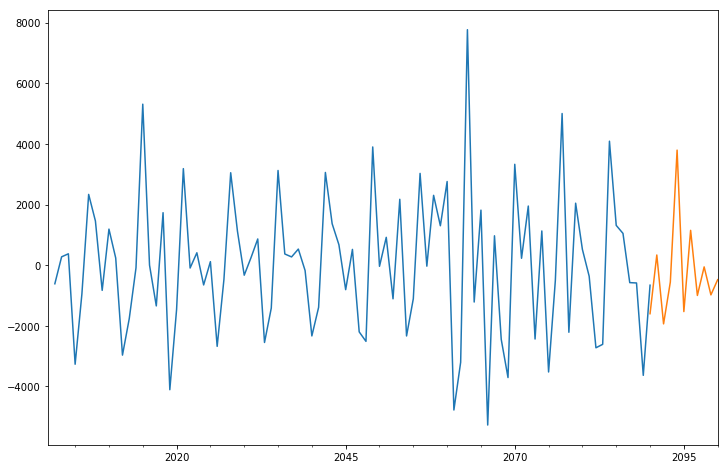

In [55]:
predict_sunspots = arma_mod20.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = diff1.loc['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)